# Capstone Project - Used Car

### Domain Background

The Indian used car market was valued at USD 24.24 billion in 2019, and it is expected to register a CAGR of 15.12% during the forecast period (2020-2025).

The pre-owned car or used car market crossed the 4 million units mark in FY 2018, which states that the used car market is 1.3 times of the new car market. One of the key growth drivers of the market is the revision of the GST rate on used cars from 28% to 12-18%.

The economic downturn caused by the pandemic further reduced the buying power of consumers towards a new car.


### Problem Statement

Consumers manually bring their cars down to workshops just to estimate the selling price of their used cars. This process takes up a lot of time and resources, in addition, human negligence may cause inaccuracy in the price prediction process.

### Our mission

- Analysis and identify the factors that potentially influence the used cars price

- Build a prediction model which can automatically help new car-sellers better and efficiently suggesting suitable price to list their used cars at.


### Data Dictionary

- Name : The brand and model of the car
- Location : The location in which the car is being sold or is available for purchase
- Year : The year or edition of the model
- Kilometers_Driven : The total kilometers driven in the car by the previous owner(s) in KM
- Fuel_Type : The type of fuel used by the car
- Transmission : The type of transmission used by the car
- Owner_Type : Whether the ownership is Firsthand, Second hand or other
- Mileage  : The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in cc
- Power: The maximum power of the engine in bhp
- Seats	: The number of seats in the car
- New_Price	: Price of new model
- Price	: The price of the used car in INR Lakhs

Note: 
- A lakh is a unit in the Indian numbering system equal to one hundred thousand.
- 👀 Observation
- 👉 Explanation

## Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import plotly
import plotly.offline as offline

## Import Data**

In [2]:
df = pd.read_csv('cars.csv')
df.head(2).append(df.tail(2))

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [3]:
# rename column's name to be more locally contact

df.rename({'Kilometers_Driven' : 'Mileage',
           'Owner_Type' : 'No_of_Owner', 
           'Mileage' : 'Fuel_Consumption', 
           'Engine': 'Engine_Capacity',
           'Power': 'Max_Power_Output', 
           'Seats' : 'Passenger_Capacity'},
           axis='columns', inplace=True)

df.head(3)

,Name,Location,Year,Mileage,Fuel_Type,Transmission,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


#### Breakdown of the new naming for the columns:
Name              : < No change > <br>
Location          : < No change > <br>
Year              : < No change > <br>
Kilometers_Driven : **changed to "Mileage"** <br>
Fuel_Type         : < No change > <br>
Transmission      : < No change > <br>
Owner_Type        : **changed to "No_of_Owner"** <br>
Mileage           : **changed to "Fuel_Consumption"** <br>
Engine            : **changed to "Engine_Capacity"** <br>
Power             : **changed to "Max_Power_Output"** <br>
Seats             : **changed to "Passenger_Capacity"** <br>
New_Price         : < No change > <br>
Price             : < No change > <br>

## Data Understanding**

- Understanding and exploring the Data
- Basic explanation about the data

In [4]:
# study the data size and details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6019 non-null   object 
 1   Location            6019 non-null   object 
 2   Year                6019 non-null   int64  
 3   Mileage             6019 non-null   int64  
 4   Fuel_Type           6019 non-null   object 
 5   Transmission        6019 non-null   object 
 6   No_of_Owner         6019 non-null   object 
 7   Fuel_Consumption    6017 non-null   object 
 8   Engine_Capacity     5983 non-null   object 
 9   Max_Power_Output    5983 non-null   object 
 10  Passenger_Capacity  5977 non-null   float64
 11  New_Price           824 non-null    object 
 12  Price               6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
# study the missing value status

df.isnull().sum()

Name                     0
Location                 0
Year                     0
Mileage                  0
Fuel_Type                0
Transmission             0
No_of_Owner              0
Fuel_Consumption         2
Engine_Capacity         36
Max_Power_Output        36
Passenger_Capacity      42
New_Price             5195
Price                    0
dtype: int64

In [6]:
# check any duplicated data

df.duplicated().value_counts()

False    6019
dtype: int64

👀 No duplicated data found.

In [7]:
# study the unique value in column Engine
df.Engine_Capacity.unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

👀 Found 'nan' and number plus string values in the column.

In [8]:
# study the unique value in column Max_Power_Output
df.Max_Power_Output.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

👀 Found 'nan' , 'null bhp' and number plus string values in the column.

In [9]:
# study the unique value in column Fuel_Consumption
df.Fuel_Consumption.unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

👀 Found 'nan' , '0.0 kmpl' and number plus string values in the column.

In [10]:
# study the unique value in column Passenger_Capacity
df.Passenger_Capacity.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

👀 Found 'nan' and 0 values in the column.

In [11]:
# study the unique value in column Location
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

👀 As we can see, there are total 11 cities in this dataset.

In [12]:
# study the unique value in column No_of_Owner
df.No_of_Owner.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

👀 There are 4 types of Owner of the car, First hand, Second Hand, Third Hand and from Fourth hand & above are categoried as 1 category.

## Data Cleaning**

- Removes duplicate and irrelevant data
- Re-structure the data
- Filter unwanted outliers and utilize useful data
- Handling missing Value
<br>
<br>
Additional: Split the name to brand and model to get more in-depth of the data information

In [13]:
# Split the "Name" column to Brand and Model 

new = df["Name"].str.split(" ", n = 1, expand = True) 
df["Brand"]= new[0] 
df["Model"]= new[1]

# drop the "Name" column
df.drop(columns =["Name"], inplace = True) 

In [14]:
# counter check the details in Brand column

df.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Bentley             1
Ambassador          1
Lamborghini         1
Isuzu               1
Name: Brand, dtype: int64

👀 Found duplicated brand name of "Isuzu" and "ISUZU".

In [15]:
# combine both to Isuzu instead

df.replace({'Brand': 'ISUZU'}, {'Brand': 'Isuzu'}, inplace = True)

In [16]:
# counter check again the details in Brand column

df.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Ambassador          1
Bentley             1
Smart               1
Lamborghini         1
Name: Brand, dtype: int64

👀 Name combined, total row of brand Isuzu become 3rows by now.

In [17]:
# counter check the details in Model column

df.Model.value_counts()

XUV500 W8 2WD                  49
Swift VDI                      45
Swift Dzire VDI                34
City 1.5 S MT                  34
Swift VDI BSIV                 31
                               ..
Micra Diesel                    1
CLA 200 CDI Style               1
Verna CRDi 1.6 AT SX Option     1
E Verito D4                     1
Sunny XL                        1
Name: Model, Length: 1876, dtype: int64

In [18]:
# Calculate the car's age and create a column for the result as Car_Age

df["Car_Age"] = 2020 - df.Year

# drop the Year column
df.drop(columns =["Year"], inplace = True) 

👉Value of Year itself do not really provide usefull information, however, using year's info to compute the car age help to describe the car value better after the depreciation of the number of used year.

In [19]:
#drop "New_Price" column as 86% of the data is nan value

df.drop(columns =["New_Price"], inplace = True)
df.columns

Index(['Location', 'Mileage', 'Fuel_Type', 'Transmission', 'No_of_Owner',
       'Fuel_Consumption', 'Engine_Capacity', 'Max_Power_Output',
       'Passenger_Capacity', 'Price', 'Brand', 'Model', 'Car_Age'],
      dtype='object')

In [20]:
# extract only the numerical value in the column
# convert the column type from string to numeric

df['Engine_Capacity'] = df['Engine_Capacity'].str.extract('(\d+)').astype(float)

In [21]:
# compute the median value

Engine_Capacity_median = round(df.Engine_Capacity.median())
Engine_Capacity_median

1493

In [22]:
# fill Nan with median value

df.fillna({'Engine_Capacity': Engine_Capacity_median}, inplace=True)

In [23]:
# counter check the details in Engine_Capacity column
df.Engine_Capacity.unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997., 1896., 1390., 1364., 2199.,
        993.,  999., 1405., 2956., 1794.,  995., 2496., 1599., 2400.,
       1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586., 2362.,
       1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150., 3198.,
       1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978., 2360.,
       3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489., 2489.,
       1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341., 2773.,
       3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948., 2359.,
       4395., 2349.,

👀 All nan value in the column replaced by the median value computed.

In [24]:
# extract only the numerical value in the column
# convert the column type from string to numeric

df['Fuel_Consumption'] = df['Fuel_Consumption'].str.extract('(\d+.\d+)').astype(float)

In [25]:
# compute the mean value and round the value with 2 decimals

Fuel_Consumption_mean = round(df.Fuel_Consumption.mean(), 2)
Fuel_Consumption_mean

18.13

In [26]:
# fill Nan with mean value

df.fillna({'Fuel_Consumption': Fuel_Consumption_mean}, inplace=True)

In [27]:
# replace all '0' in the column with mean value computed

df.Fuel_Consumption.replace (0, Fuel_Consumption_mean, inplace=True)

In [28]:
# counter check the details in Fuel_Consumption column
df.Fuel_Consumption.unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 , 18.13, 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

👀 All nan and 0 value in the column replaced by the median value computed.

In [29]:
# extract only the numerical value in the column
# convert the column type from string to numeric

df['Max_Power_Output'] = df['Max_Power_Output'].str.extract('(\d+.\d+)').astype(float)

In [30]:
# compute the median value and round the value with 2 decimals

Max_Power_Output_median = round(df.Max_Power_Output.median(), 2)
Max_Power_Output_median

103.6

In [31]:
# fill Nan with median value

df.fillna({'Max_Power_Output': Max_Power_Output_median}, inplace=True)

In [32]:
# replace all '0' in the column with median value computed

df.Max_Power_Output.replace (0, Max_Power_Output_median, inplace=True)

In [33]:
# counter check the details in Fuel_Consumption column
df.Max_Power_Output.unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  , 103.25 , 116.3  , 187.7  , 115.   , 175.56 ,
        98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,  67.1  ,
       102.   , 108.45 , 138.1  , 184.   , 179.5  , 103.5  , 254.8  ,
        73.9  ,  46.3  ,  37.5  ,  82.9  , 149.92 , 138.03 , 112.2  ,
       163.7  , 105.   , 174.33 , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  , 186.   , 170.   , 140.   , 194.   , 500.   , 108.5  ,
        86.8  , 187.74 , 132.   ,  86.7  ,  73.94 , 117.3  , 218.   ,
       168.5  ,  89.84 , 110.   ,  82.85 , 241.4  , 270.9  , 126.32 ,
       130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,  37.48 ,
       120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 , 121.3  ,
       143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   , 362.9  ,
        67.06 , 120.7  , 258.   ,  81.86 , 112.   ,  88.73 ,  57.6  ,
       157.75 , 102.5  , 201.1  ,  83.1  ,  68.05 , 106.   , 100.   ,
        81.83 ,  64.

👀 All nan and 0 value in the column replaced by the median value computed.

In [34]:
# compute the median value and round the value

Passenger_Capacity_median = round(df.Passenger_Capacity.median())
Passenger_Capacity_median

5

In [35]:
# fill Nan with median value

df.fillna({'Passenger_Capacity': Passenger_Capacity_median}, inplace=True)

In [36]:
# replace all '0' in the column with median value computed

df.Passenger_Capacity.replace (0, Passenger_Capacity_median, inplace=True)

In [37]:
# counter check the details in Fuel_Consumption column
df.Passenger_Capacity.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

👀 All nan and 0 value in the column replaced by the median value computed.

In [38]:
# counter check the missing value in the datasets after the cleaning process
df.isnull().sum()

Location              0
Mileage               0
Fuel_Type             0
Transmission          0
No_of_Owner           0
Fuel_Consumption      0
Engine_Capacity       0
Max_Power_Output      0
Passenger_Capacity    0
Price                 0
Brand                 0
Model                 0
Car_Age               0
dtype: int64

👀 No more missing value in the datasets.

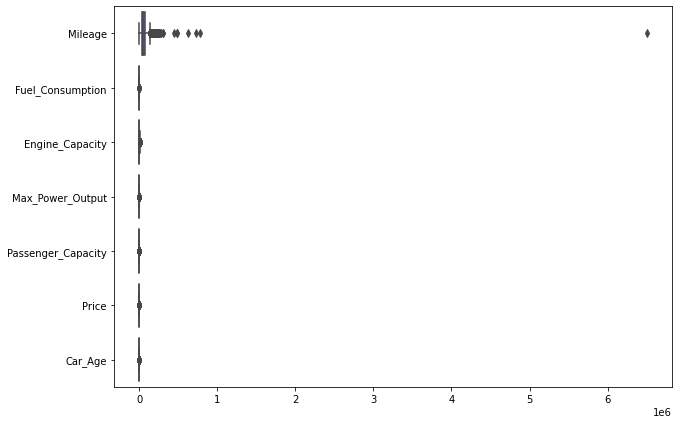

In [39]:
# plot graph to identify the outliers

plt.figure(figsize=(10,7))
sns.boxplot(data=df, palette='rainbow', orient='h')

👀 Found outlier only in Mileage column.

In [40]:
# search for the max outlier data point indicate in above graph
maxOutlier = df.Mileage.max()
maxOutlier

6500000

In [41]:
# Study the max Car_Age in the datasets
df.Car_Age.max()

22

👉 maxOutlier indicated above expected to be an error. Not possible a car's mileage at 6.5 millions km in 22 years time.

In [42]:
# remove the maxOutlier

df = df[df.Mileage != maxOutlier ]

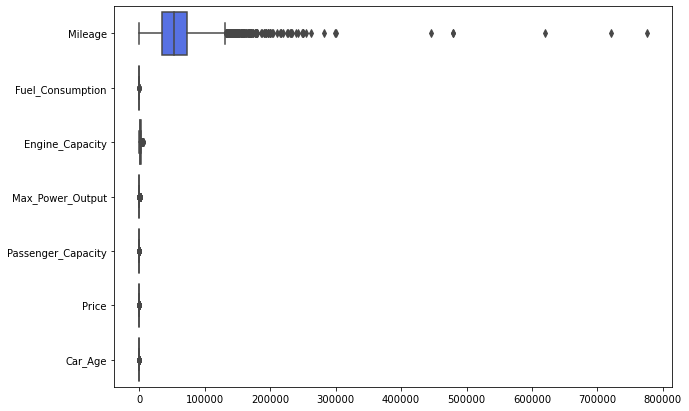

In [43]:
# plot graph to study again the outliers after remove the maxOutlier

plt.figure(figsize=(10,7))
sns.boxplot(data=df, palette='rainbow', orient='h')

In [44]:
# counter check the missing value in the datasets after the cleaning process
df.isnull().sum()

Location              0
Mileage               0
Fuel_Type             0
Transmission          0
No_of_Owner           0
Fuel_Consumption      0
Engine_Capacity       0
Max_Power_Output      0
Passenger_Capacity    0
Price                 0
Brand                 0
Model                 0
Car_Age               0
dtype: int64

👀 All nan value removed from the datasets.

In [45]:
# counter check the data type, columns'name and data size in the datasets after the cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            6018 non-null   object 
 1   Mileage             6018 non-null   int64  
 2   Fuel_Type           6018 non-null   object 
 3   Transmission        6018 non-null   object 
 4   No_of_Owner         6018 non-null   object 
 5   Fuel_Consumption    6018 non-null   float64
 6   Engine_Capacity     6018 non-null   float64
 7   Max_Power_Output    6018 non-null   float64
 8   Passenger_Capacity  6018 non-null   float64
 9   Price               6018 non-null   float64
 10  Brand               6018 non-null   object 
 11  Model               6018 non-null   object 
 12  Car_Age             6018 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 658.2+ KB


👀 All data type corrected accordingly. Data size changed from original 6019rows x 13 columns to 6018rows x 13 columns.

In [46]:
# counter check the dataset's final arrangement by sampling function
df.head(3)

,Location,Mileage,Fuel_Type,Transmission,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Brand,Model,Car_Age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,10
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9


## Visualization / EDA**

- Correlation of data
- Plotting
- Finding insights of the data

In [47]:
# study the statistical data
df.describe()

,Mileage,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Car_Age
count,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000
mean,57668.047690,18.340178,1620.281157,117.705437,5.277667,9.470243,6.642406
std,37878.783175,4.151415,599.424157,50.641910,0.803538,11.165926,3.269677
min,171.000000,6.400000,72.000000,34.200000,2.000000,0.440000,1.000000
25%,34000.000000,15.400000,1198.000000,86.800000,5.000000,3.500000,4.000000
50%,53000.000000,18.150000,1493.000000,103.600000,5.000000,5.640000,6.000000
75%,73000.000000,21.100000,1969.000000,138.030000,5.000000,9.950000,9.000000
max,775000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000,22.000000


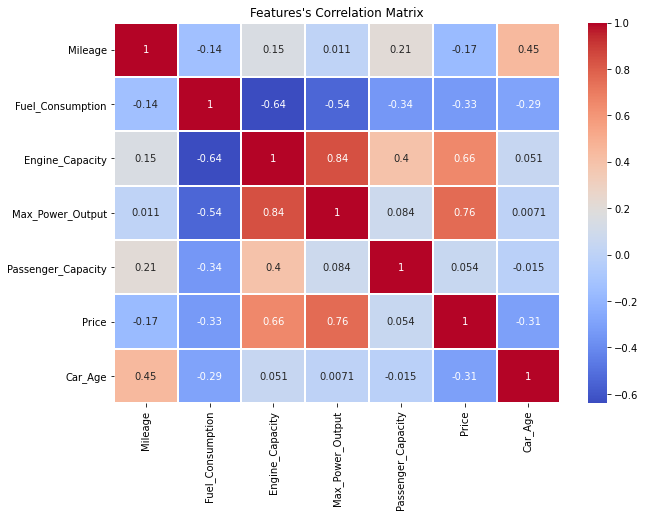

In [48]:
# Visualize the correlations between the independant features

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='coolwarm',linecolor='white',linewidths=1, annot=True)
plt.title("Features's Correlation Matrix");

👉  Heat map of feature correlation only compared the numerical features.

Positive correlation: If an increase in feature A leads to an increase in feature b, then they are positively related. A value of 1 indicates a complete positive correlation.

Negative correlation: If the increase of feature A leads to the decrease of feature b, then there is a negative correlation. A value of -1 indicates a complete negative correlation.

👀 The above results show :
- If Engine_Capacity or Max_Power_Output increase, used car price will also be increased.
  
- On the contrary, if Fuel_Consumption or Car_Age increased, used car price will go down instead.

In [49]:
# define a function to plot and analyse the popularity of each categorical column

def count(column) :
    
    plt.figure(figsize=(16,6))
    splot = sns.countplot(x=column, data=df)
    plt.suptitle('Used Car Sold By ' + column)
    plt.ylabel('Number Of Sales Transaction')
    plt.xticks(rotation=90)
    
    for p in splot.patches:
        splot.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

**Location exploratory**

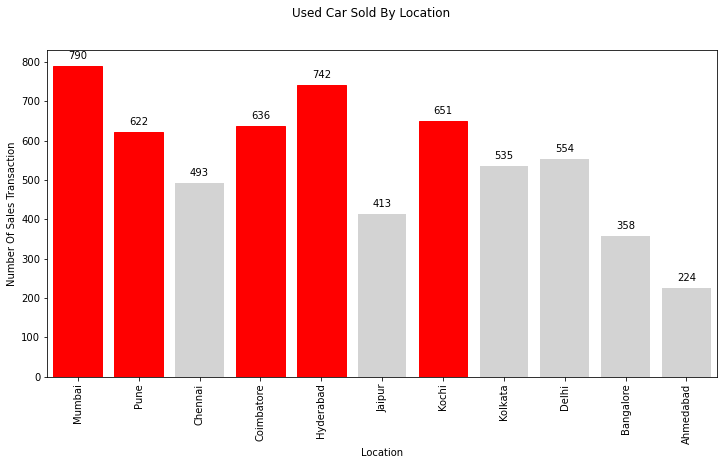

In [50]:
# plot graph to count the column location

plt.figure(figsize=(12,6))
splot = sns.countplot(x='Location', data=df)
plt.suptitle("Used Car Sold By Location")
plt.ylabel('Number Of Sales Transaction')
plt.xticks(rotation=90)
    
heights = [p.get_height() for p in splot.patches]
fifth_highest = sorted(heights)[-5]
    
for p in splot.patches:
         
    splot.annotate(p.get_height(), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    if  p.get_height() >= fifth_highest:
        p.set_color('red')
    
    else:
        p.set_facecolor('lightgrey')

plt.show()

👀 Mumbai has the most transactions，follow by Hyderabad, Kochi, Coimbatore and Pune.

**Fuel_Type exploratory**

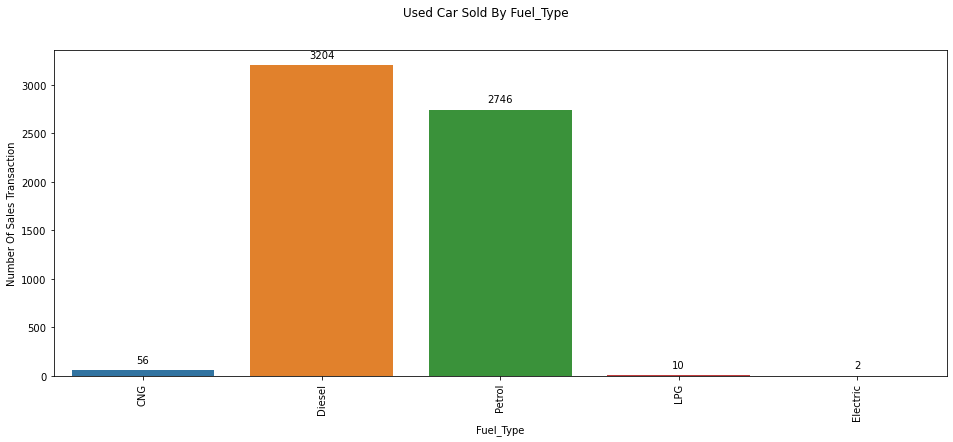

In [51]:
# plot graph to count the column Fuel_Type
count ('Fuel_Type')

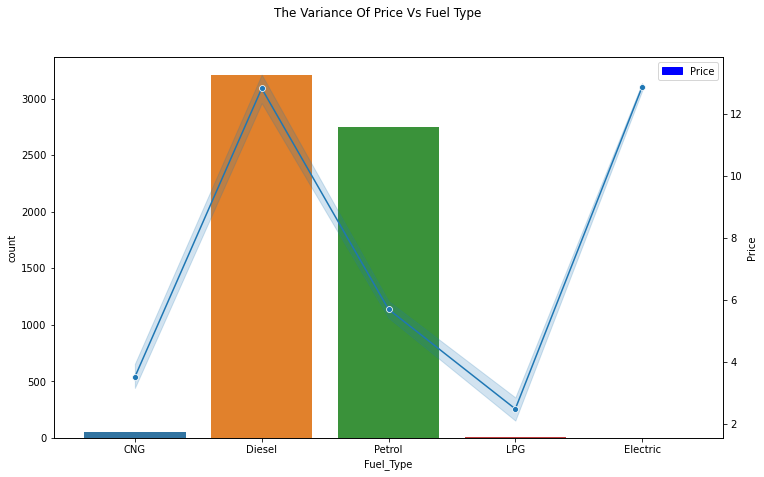

In [52]:
# Plot graph to analysis how price affect the fuel type

fig, ax1 = plt.subplots(figsize=(12,7))
plt.suptitle("The Variance Of Price Vs Fuel Type")
sns.countplot(data=df, x='Fuel_Type', ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Fuel_Type' , y='Price', marker='o', sort=False, ax=ax2)
blue_patch = mpatches.Patch(color='blue', label='Price')
plt.legend(handles=[blue_patch])
plt.show()

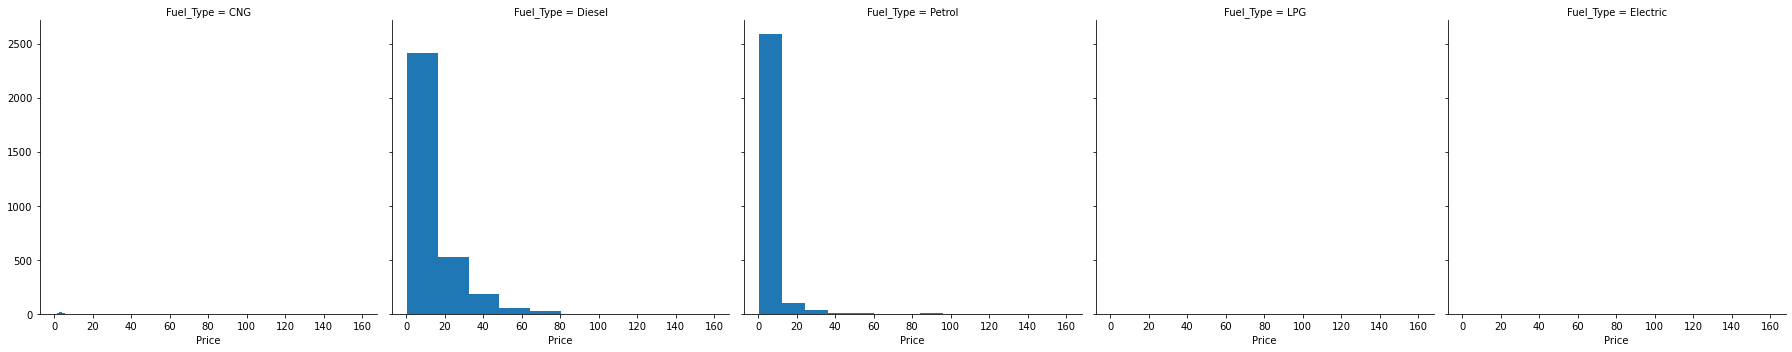

In [53]:
# plot graph to study the price distribution vs Fuel_Type

g = sns.FacetGrid(data=df, col='Fuel_Type', height=5, aspect=1)
g.map(plt.hist,'Price');

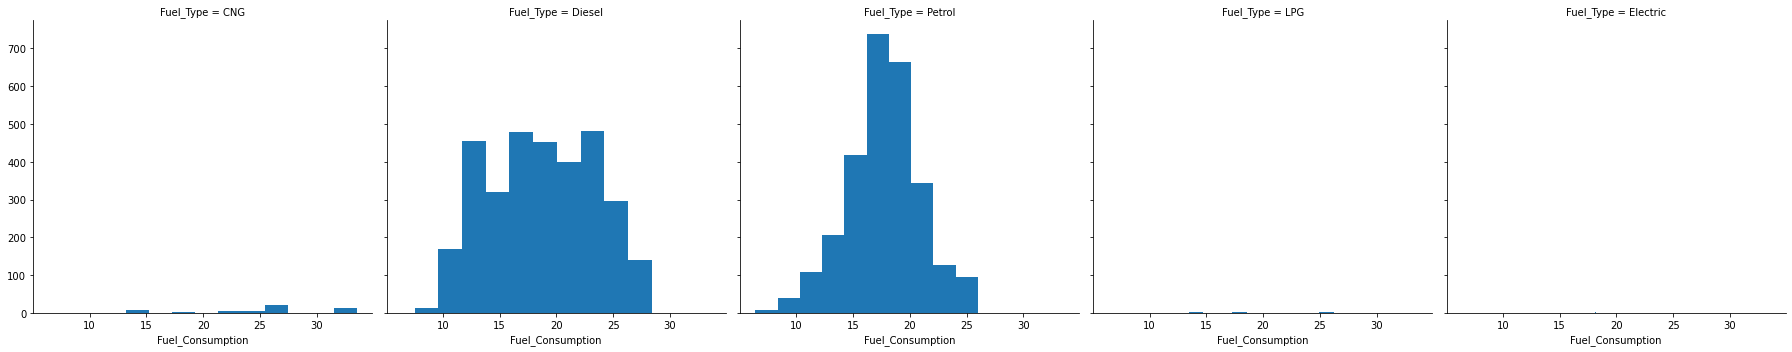

In [54]:
# plot graph to study the Fuel_Consumption distribution vs Fuel_Type

g = sns.FacetGrid(data=df, col='Fuel_Type', height=5, aspect=1)
g.map(plt.hist,'Fuel_Consumption');

👀 Diesel cars are the most popular options in India. Even though the car price is higher but due to the savings in the cost of fuel (average of 11% to 13% cheaper compared Petrol and Diesel) and a lower fuel consumption per kilometer driven, car buyers are still more than willing to go for diesel car instead.

**Transmission exploratory**

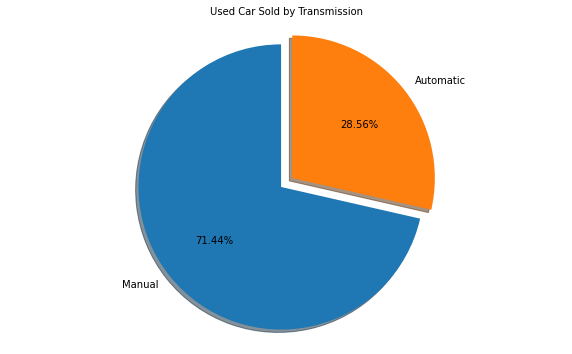

In [55]:
# plot graph to count the column Transmission

labels = 'Manual', 'Automatic'
sizes = [df.Transmission[df['Transmission']=='Manual'].count(), df.Transmission[df['Transmission']== 'Automatic'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Used Car Sold by Transmission", size = 10)
plt.show()

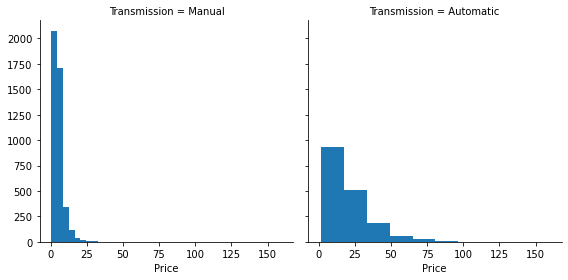

In [56]:
# plot graph to study the price distribution vs Transmission

g = sns.FacetGrid(data=df,col='Transmission', height=4, aspect=1)
g.map(plt.hist,'Price');

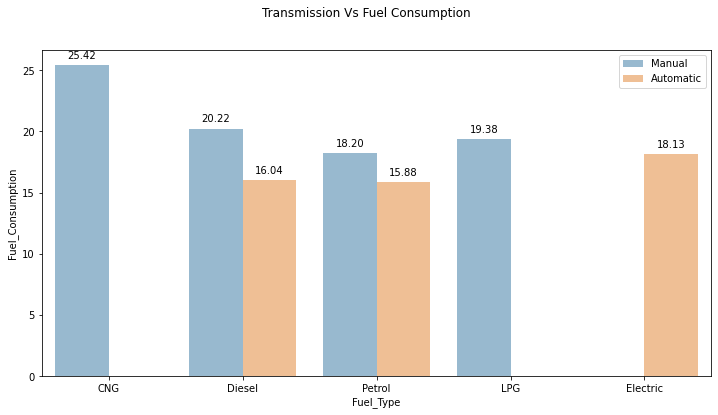

In [57]:
# plot graph to study the distribution of Fuel_Consumption vs Transmission by Fuel_Type division

plt.figure(figsize=(12,6))
splot = sns.barplot(x='Fuel_Type',  y='Fuel_Consumption', data=df, hue = 'Transmission', alpha=.5, ci = None)
plt.legend(loc='upper right')
plt.suptitle("Transmission Vs Fuel Consumption")

for p in splot.patches:
         
    splot.annotate(format(p.get_height(),'.2f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

👀 A manual car is more popular in the Indian market. Besides the overall price is cheaper, the fuel consumption of a manual car is more savings compared to an automatic car.

**No_of_Owner exploratory**

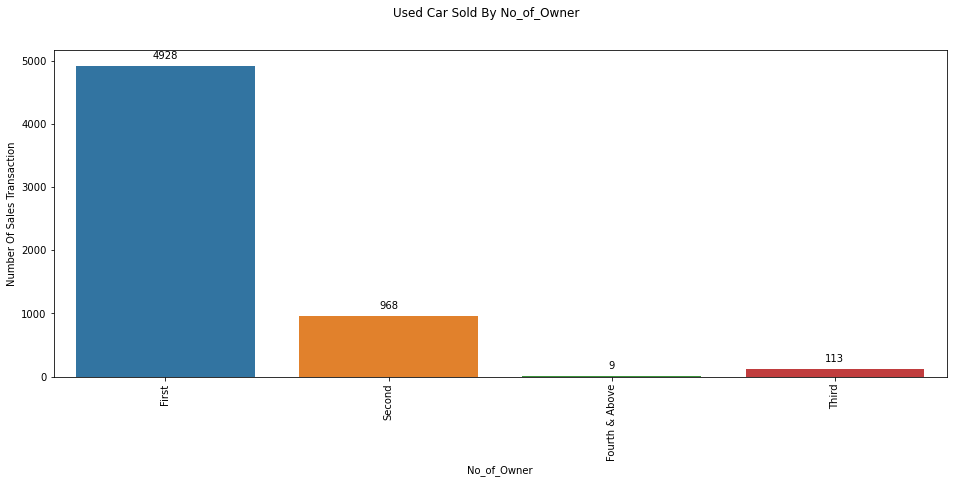

In [58]:
# plot graph to count the column No_of_Owner
count ('No_of_Owner')

👀 The buyer still prefers to buy a car that has a lesser past owner.

**Passenger_Capacity exploratory**

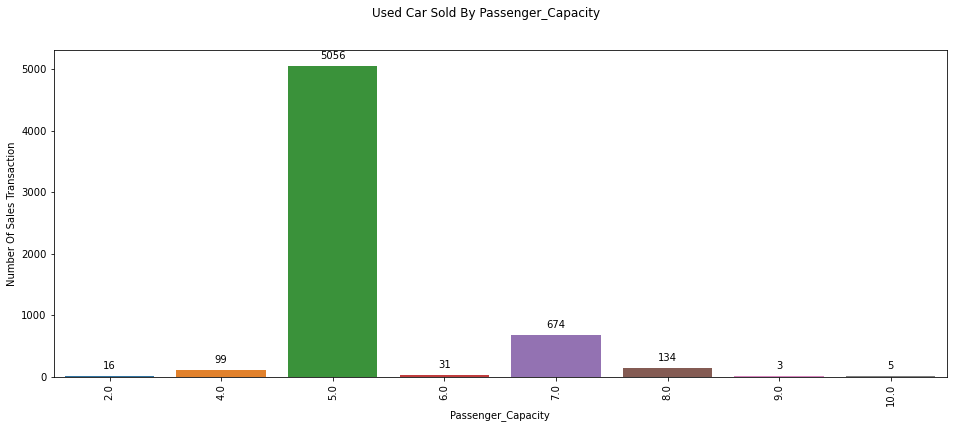

In [59]:
# plot graph to count the column Passenger_Capacity
count ('Passenger_Capacity')

👀 Saloon(5 seated) cars still the most popular options for general use.  But for a bigger family or commercial usage, an MPV or 7 seated car is another best choice.

**Brand and Model exploratory**

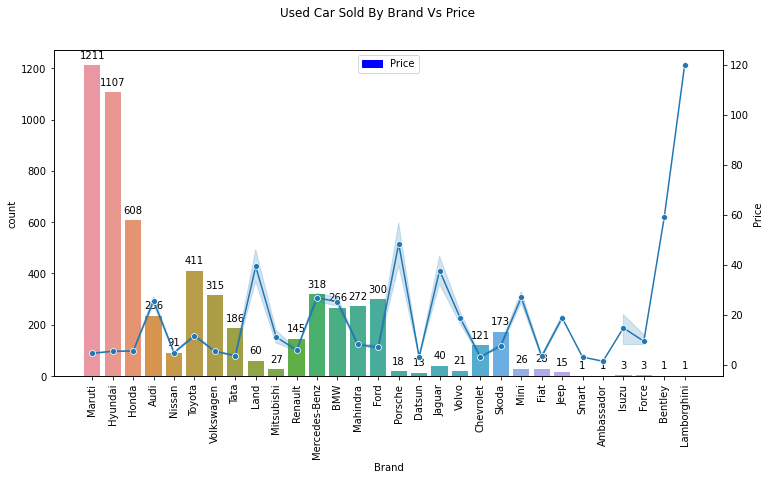

In [60]:
# Plot graph to analysis how price and brand affect the sales transaction(volume)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle('Used Car Sold By Brand Vs Price')
plt.ylabel('Number Of Sales Transaction')
plt.xticks(rotation=90)
splot = sns.countplot(data = df, x='Brand', ax=ax1)

for p in splot.patches:
        splot.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');
ax2 = ax1.twinx()
sns.lineplot(data = df, x='Brand' , y='Price', marker='o', sort = False, ax=ax2)
blue_patch = mpatches.Patch(color='blue', label='Price')
plt.legend(handles=[blue_patch], loc='upper center' )
plt.show()

👀 Car buyers are more sensitive to the brand rather than the manufacturing country.

**Car_Age exploratory**

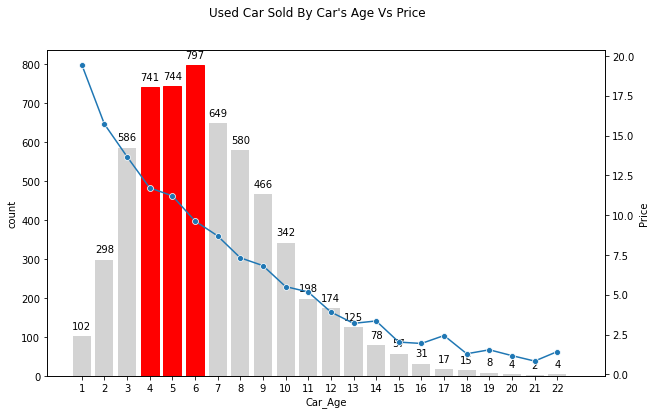

In [61]:
# Plot graph to analysis how price and Car's age affect the sales transaction(volume)

fig, ax1 = plt.subplots(figsize=(10,6))
plt.suptitle("Used Car Sold By Car's Age Vs Price")
plt.ylabel('Number Of Sales Transaction')
splot = sns.countplot(data = df, x='Car_Age', ax=ax1)
heights = [p.get_height() for p in splot.patches]
third_highest = sorted(heights)[-3]
    
for p in splot.patches:
         
    splot.annotate(p.get_height(), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    if  p.get_height() >= third_highest:
        p.set_color('red')
    
    else:
        p.set_facecolor('lightgrey')

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Car_Age' , y='Price', marker='o', sort = True, ci = None, ax=ax2)
line = ax2.lines[0] # get the line
line.set_xdata(line.get_xdata() - 1)
plt.show()

👀 Due to the high depreciation from 1st year to 4th year, used car aged from 4 to 6 years is more popular. The above illustration shows that from the 4th years onwards, the depreciation value started to cut down tremendously.

**Max_Power_Output exploratory**

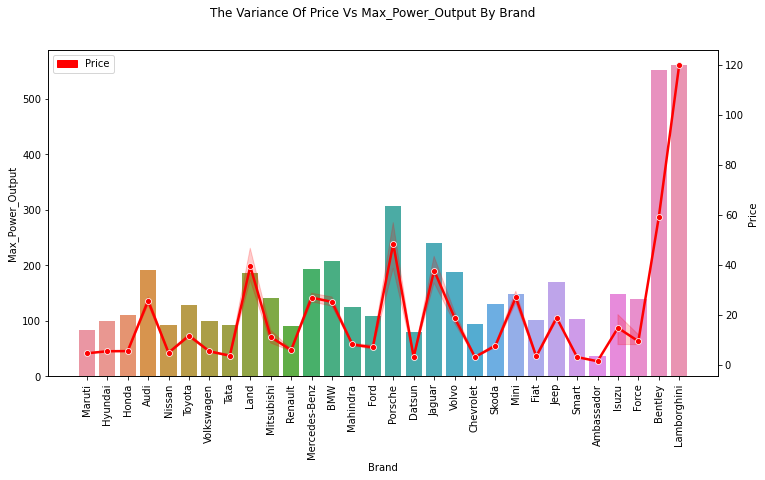

In [62]:
# Plot graph to analysis how Max_Power_Output affect the price by Brand

fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle("The Variance Of Price Vs Max_Power_Output By Brand")
sns.barplot(data=df, x='Brand', y='Max_Power_Output', ci=None, ax=ax1)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Brand' , y='Price', marker='o', color='red', linewidth=2.5, sort=False, ax=ax2)
blue_patch = mpatches.Patch(color='red', label='Price')
plt.legend(handles=[blue_patch])
plt.show()

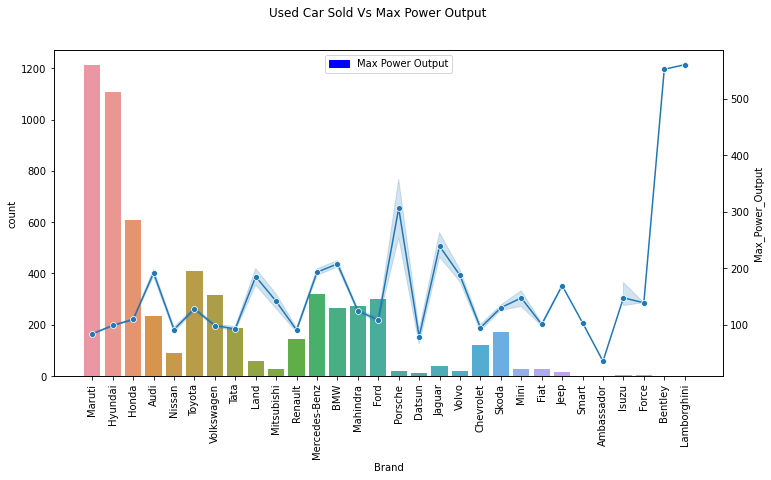

In [63]:
# Plot graph to analysis how Max Power Output affect the sales transaction by Brand
fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle("Used Car Sold Vs Max Power Output")
sns.countplot(data = df, x='Brand', ax=ax1)
plt.xticks(rotation=90);

ax2 = ax1.twinx()
sns.lineplot(data=df, x='Brand', y='Max_Power_Output', marker='o', sort= False, ax=ax2)
blue_patch = mpatches.Patch(color='blue', label='Max Power Output')
plt.legend(handles=[blue_patch], loc= 'upper center' )
plt.show()

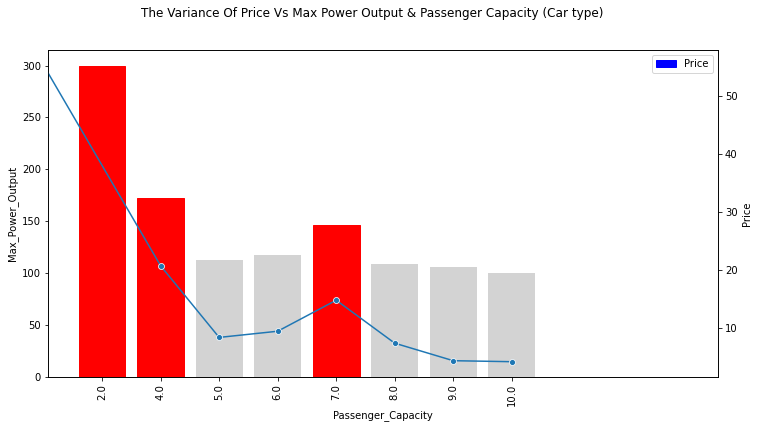

In [64]:
# Plot graph to analysis how Max Power Output affect the price by car type (Passenger_Capacity)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle("The Variance Of Price Vs Max Power Output & Passenger Capacity (Car type)")
splot = sns.barplot(data=df, x='Passenger_Capacity', y='Max_Power_Output', ci=None, ax=ax1)
plt.xticks(rotation=90)

heights = [p.get_height() for p in splot.patches]
third_highest = sorted(heights)[-3]
    
for p in splot.patches:
         
    if  p.get_height() >= third_highest:
        p.set_color('red')
    
    else:
        p.set_facecolor('lightgrey')

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Passenger_Capacity' , y='Price', marker='o', sort=True, ax=ax2, ci=None)
blue_patch = mpatches.Patch(color='blue', label='Price')
plt.legend(handles=[blue_patch])
line = ax2.lines[0] # get the line
line.set_xdata(line.get_xdata() - 3)
plt.show()

👀
- Used car price tie very closely with the Max_Power_Output. 

- In general, high-horsepower cars belong to luxury car categories, therefore price expected to be higher.

- Max_Power_Output is not the main factor to help generate more transactions.  Affordable pricing is still the main concern of the economic category car buyer.

- 2, 4 and 7 seated cars come with higher horsepower.  To generate higher profit thru higher selling price, above mentioned car type should be the focus categories.

**Engine_Capacity exploratory**

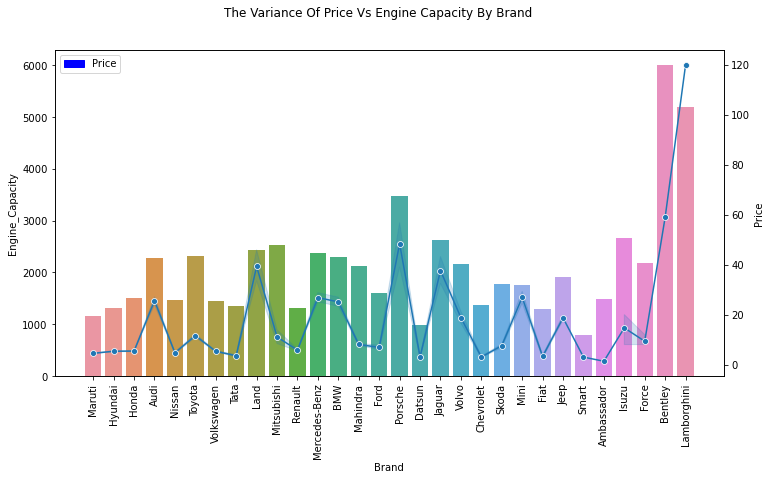

In [65]:
# Plot graph to analysis how Engine capacity affect the selling price by Brand

fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle('The Variance Of Price Vs Engine Capacity By Brand')
sns.barplot(data=df, x='Brand', y='Engine_Capacity', ci=None, ax=ax1)
plt.xticks(rotation=90);

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Brand' , y='Price', marker='o', sort=False, ax=ax2)
blue_patch = mpatches.Patch(color='blue', label='Price')
plt.legend(handles=[blue_patch])
plt.show()

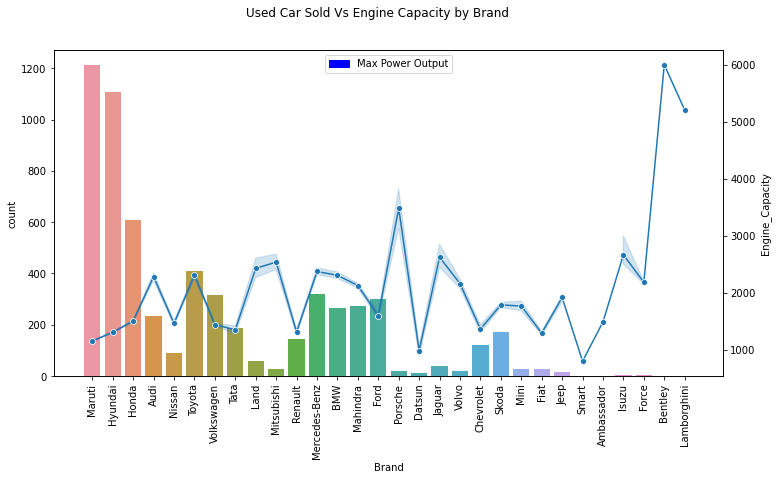

In [66]:
# Plot graph to analysis how Engine Capacity affect the sales transaction by Brand

fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle("Used Car Sold Vs Engine Capacity by Brand")
sns.countplot(data=df, x='Brand', ax=ax1)
plt.xticks(rotation=90);

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Brand' , y='Engine_Capacity', marker='o', sort=False, ax=ax2)
blue_patch = mpatches.Patch(color='blue', label='Max Power Output')
plt.legend(handles=[blue_patch], loc= 'upper center' )
plt.show()

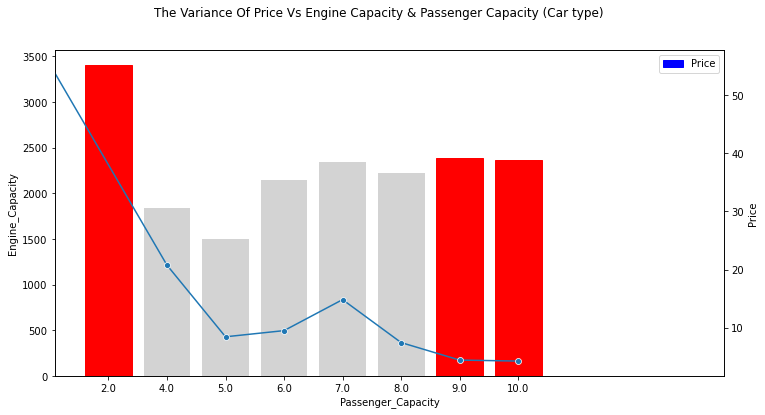

In [67]:
# Plot graph to analysis how Engine capacity affect the price by car type (Passenger_Capacity)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.suptitle("The Variance Of Price Vs Engine Capacity & Passenger Capacity (Car type)")
splot = sns.barplot(data=df, x='Passenger_Capacity', y='Engine_Capacity', ci=None, ax=ax1)

heights = [p.get_height() for p in splot.patches]
third_highest = sorted(heights)[-3]
    
for p in splot.patches:
         
    if  p.get_height() >= third_highest:
        p.set_color('red')
    
    else:
        p.set_facecolor('lightgrey')

ax2 = ax1.twinx()
sns.lineplot(data = df, x='Passenger_Capacity' , y='Price', marker='o', sort=True, ax=ax2, ci=None)
blue_patch = mpatches.Patch(color='blue', label='Price')
plt.legend(handles=[blue_patch])
line = ax2.lines[0] # get the line
line.set_xdata(line.get_xdata() - 3)
plt.show()

👀
- In general, used car prices tie closely with the Engine capacity, except for SUV, MUV and super sports car type. 

- Engine Capacity is not the main factor to help generate more transactions.  Affordable pricing is still the main concern of the economic category car buyer.

- Except for the super sports car, high seated capacity car need higher Engine capacity to operate.


**Mileage exploratory**

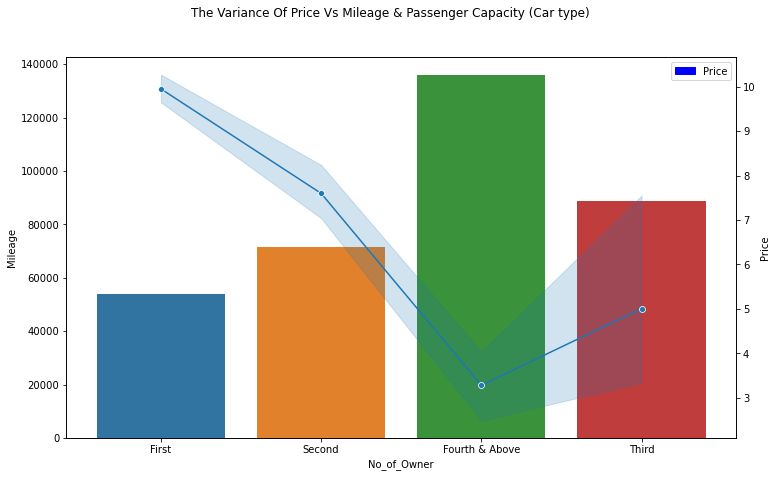

In [68]:
# Plot graph to analysis how Mileage affect the price by No. of Owner

fig, ax1 = plt.subplots(figsize=(12,7))
plt.suptitle("The Variance Of Price Vs Mileage & Passenger Capacity (Car type)")
sns.barplot(data=df, x='No_of_Owner', y='Mileage', ci=None, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data = df, x='No_of_Owner' , y='Price', marker='o', sort=False, ax=ax2)
blue_patch = mpatches.Patch(color='blue', label='Price')
plt.legend(handles=[blue_patch])
plt.show()

👀  Price will be decreased with higher mileage and higher in number of owner.

## Data Pre-Processing**

- Feature Engineering(Encoding, log and Scaling)
- Feature Split

**Encoding the categorical data**

In [69]:
# OHE for 'object' variables which do not likely have any ranking with them

df = pd.get_dummies(data=df, columns=['Fuel_Type', 'Transmission', 'Location'], drop_first = True)
df.head()

,Mileage,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Brand,Model,Car_Age,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,72000,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,10,...,0,0,0,0,0,0,0,0,1,0
1,41000,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5,...,0,0,0,0,0,0,0,0,0,1
2,46000,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9,...,0,1,0,0,0,0,0,0,0,0
3,87000,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,8,...,0,1,0,0,0,0,0,0,0,0
4,40670,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,7,...,0,0,1,0,0,0,0,0,0,0


In [70]:
# convert 'object' variables which likely have ranking with them

from sklearn.preprocessing import OrdinalEncoder

ownerCount = [['First', 'Second', 'Third', 'Fourth & Above']]

encoder = OrdinalEncoder(ownerCount)

df['No_of_Owner'] = encoder.fit_transform(np.array(df.No_of_Owner).reshape(-1,1))
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass categories=[['First', 'Second', 'Third', 'Fourth & Above']] as keyword args. From version 0.25 passing these as positional arguments will result in an error



,Mileage,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Brand,Model,Car_Age,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,72000,0.0,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,10,...,0,0,0,0,0,0,0,0,1,0
1,41000,0.0,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,5,...,0,0,0,0,0,0,0,0,0,1
2,46000,0.0,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,9,...,0,1,0,0,0,0,0,0,0,0
3,87000,0.0,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,8,...,0,1,0,0,0,0,0,0,0,0
4,40670,1.0,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,7,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# study the unique value in column Brand
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

👉Frequency Encoding

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.

In [72]:
# encode column Brand by frequency encoder 

counts = df.Brand.value_counts()

# get frequency of each category
encoding = counts/len(df)

# map() maps the frequency of Brand to each observation
df['Brand'] = df.Brand.map(encoding)
df.head()

,Mileage,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Brand,Model,Car_Age,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,72000,0.0,26.60,998.0,58.16,5.0,1.75,0.201230,Wagon R LXI CNG,10,...,0,0,0,0,0,0,0,0,1,0
1,41000,0.0,19.67,1582.0,126.20,5.0,12.50,0.183948,Creta 1.6 CRDi SX Option,5,...,0,0,0,0,0,0,0,0,0,1
2,46000,0.0,18.20,1199.0,88.70,5.0,4.50,0.101030,Jazz V,9,...,0,1,0,0,0,0,0,0,0,0
3,87000,0.0,20.77,1248.0,88.76,7.0,6.00,0.201230,Ertiga VDI,8,...,0,1,0,0,0,0,0,0,0,0
4,40670,1.0,15.20,1968.0,140.80,5.0,17.74,0.039216,A4 New 2.0 TDI Multitronic,7,...,0,0,1,0,0,0,0,0,0,0


In [73]:
# encode column Model by frequency encoder 

counts = df.Model.value_counts()

# get frequency of each category
encoding = counts/len(df)

# map() maps the frequency of Model to each observation
df['Model'] = df.Model.map(encoding)
df.head()

,Mileage,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Brand,Model,Car_Age,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,72000,0.0,26.60,998.0,58.16,5.0,1.75,0.201230,0.002991,10,...,0,0,0,0,0,0,0,0,1,0
1,41000,0.0,19.67,1582.0,126.20,5.0,12.50,0.183948,0.001994,5,...,0,0,0,0,0,0,0,0,0,1
2,46000,0.0,18.20,1199.0,88.70,5.0,4.50,0.101030,0.000665,9,...,0,1,0,0,0,0,0,0,0,0
3,87000,0.0,20.77,1248.0,88.76,7.0,6.00,0.201230,0.004154,8,...,0,1,0,0,0,0,0,0,0,0
4,40670,1.0,15.20,1968.0,140.80,5.0,17.74,0.039216,0.001163,7,...,0,0,1,0,0,0,0,0,0,0


**Convert the skewed data by Log**

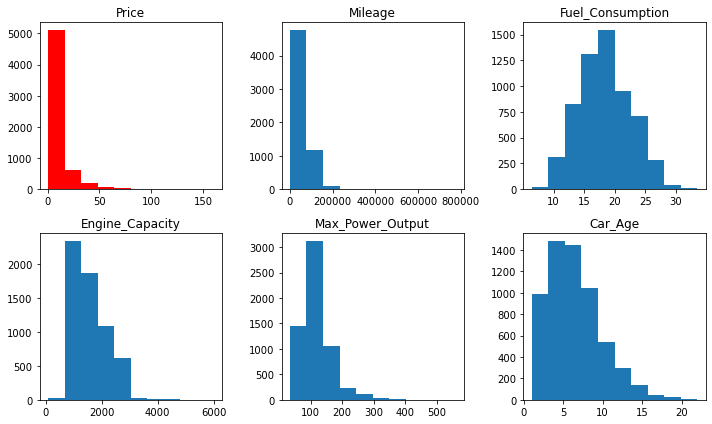

In [74]:
# Plot graph to study the numerical dataset distribution

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (10,6))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

ax0.hist(df.Price, color='red') # Target
ax0.set_title('Price')

ax1.hist(df.Mileage)
ax1.set_title('Mileage')

ax2.hist(df.Fuel_Consumption)
ax2.set_title('Fuel_Consumption')

ax3.hist(df.Engine_Capacity)
ax3.set_title('Engine_Capacity')

ax4.hist(df.Max_Power_Output)
ax4.set_title('Max_Power_Output')

ax5.hist(df.Car_Age)
ax5.set_title('Car_Age')

fig.tight_layout()
plt.show()

👀 Except for Fuel_Consumption, most data skewed to the left.

In [75]:
# used Log transformation to transform skewed data to approximately conform to normality.

df['Mileage'] = np.log((1+ df['Mileage']))
df['Engine_Capacity'] = np.log((1+ df['Engine_Capacity']))
df['Max_Power_Output'] = np.log((1+ df['Max_Power_Output']))
df['Price'] = np.log((1+ df['Price']))
df['Car_Age'] = np.log((1+ df['Car_Age']))

In [76]:
df.head()

,Mileage,No_of_Owner,Fuel_Consumption,Engine_Capacity,Max_Power_Output,Passenger_Capacity,Price,Brand,Model,Car_Age,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,11.184435,0.0,26.60,6.906755,4.080246,5.0,1.011601,0.201230,0.002991,2.397895,...,0,0,0,0,0,0,0,0,1,0
1,10.621352,0.0,19.67,7.367077,4.845761,5.0,2.602690,0.183948,0.001994,1.791759,...,0,0,0,0,0,0,0,0,0,1
2,10.736418,0.0,18.20,7.090077,4.496471,5.0,1.704748,0.101030,0.000665,2.302585,...,0,1,0,0,0,0,0,0,0,0
3,11.373675,0.0,20.77,7.130099,4.497139,7.0,1.945910,0.201230,0.004154,2.197225,...,0,1,0,0,0,0,0,0,0,0
4,10.613271,1.0,15.20,7.585281,4.954418,5.0,2.930660,0.039216,0.001163,2.079442,...,0,0,1,0,0,0,0,0,0,0


**Split the data into train and test set**

In [77]:
# drop Price in variable X as it's a target column (y)
# split the train and test sets to 70%-30% ratio

from sklearn.model_selection import train_test_split

X = df.drop(['Price'] , axis=1)
y = df['Price']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state = 789)

**Scaling the features**

In [78]:
# Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## ML Model Building**

Based on the dataset provided and the task assigned to do the prediction on used car pricing, **multivariate regression algorithms** under supervised learning will be best used in this scenario.

As Regression is used for predicting the occurrence of an event depending on the degree of association with variables.

**Use K-fold cross validator to examine which best classifier algorithms to apply**

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [79]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb              

scores = []
titles = []

classifier = [('LR', LinearRegression()),
              ('Rg', Ridge()),
              ('RF', RandomForestRegressor()),
              ('GB', GradientBoostingRegressor()),
              ('XGB', xgb.XGBRegressor())]
 
for title, model in classifier:
    kfold = KFold(n_splits=10)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)
    scores.append(cv_scores)
    titles.append(title)
    score = "%s: %f" % (title, cv_scores.mean())
    print(score)

LR: 0.845452
Rg: 0.845459
RF: 0.930662
GB: 0.924877
XGB: 0.943048


👀 The best scores is XGBoosting Regressor (XGB). 

### XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is a powerful decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage, a regression tree is fit on the negative gradient of the given loss function. The predictive power of these individual models is weak and prone to overfitting but combining many such weak models in an ensemble will lead to an overall much improved result. 

Xgboost used a more regularized model formalization to control over-fitting, which gives it better performance. It also has other qualities like computation power, sparse aware split finding to handle etc.

**Run a XGBoost Regressor base model with the train set and evaluate on the test set by R-Squared and RMSE metrics.**

In [80]:
# Train the base model
base_model = xgb.XGBRegressor(random_state = 789)
base_model.fit(X_train, y_train)

# evaluate the model
y_pred = base_model.predict(X_test)

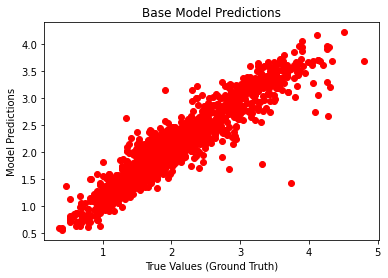

In [81]:
plt.scatter(y_test, y_pred, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Base Model Predictions');

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)) , '.3f'))
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.258 
MAE = 0.185210307930479 
R2 = 0.8796127325119


**Use GridSearCV to find optimal parameters.**

In [83]:
from sklearn.model_selection import GridSearchCV

param_dict = {'n_estimators' : [10, 50, 100], 
              'max_depth' : [5, 7, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'gamma': [0, 0.25, 1.0]} 

In [84]:
grid_model = GridSearchCV(param_grid= param_dict , 
                             estimator= base_model, 
                             cv= 5 , verbose=1)

In [85]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   46.5s finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=789,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
    

In [86]:
grid_model.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

**Building the model by the best parameters from GridSearchCV.**

In [87]:
tune_model = xgb.XGBRegressor(n_estimators= 100, learning_rate= 0.1, 
                                      max_depth= 7, gamma= 0, random_state=789)

In [88]:
tune_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=789,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
y_pred_tune = tune_model.predict(X_test)

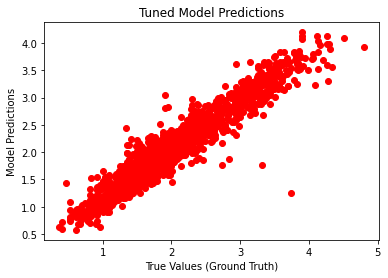

In [90]:
plt.scatter(y_test, y_pred_tune, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Tuned Model Predictions');

In [91]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred_tune)), '.3f'))
MAE = format(mean_absolute_error(y_test, y_pred_tune),'.3f') 
r2 = format(r2_score(y_test, y_pred_tune),'.3f')
print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.231 
MAE = 0.166 
R2 = 0.904


👉R-Squared

- measures the degree of variability on dependent variables that can be explained by the model.

- A metric to determines how well the model fits the dependent variables

- Nearer to 1.0 is better, range of 0.8 and above is good

👀 In this case, the predicted R-squared reveals that up to 90.40% of the data fits in the tuned model.

## Conclusion**

- Feature Importance
- Insights

**Identify the feature_importances by the tune model.**

In [92]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

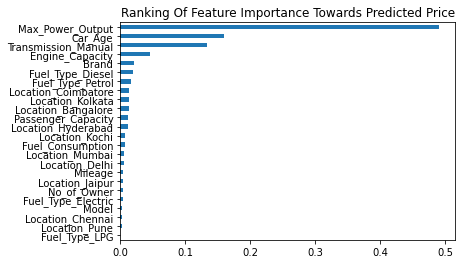

In [93]:
feat_importances = pd.Series(tune_model.feature_importances_, index=X_test.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Ranking Of Feature Importance Towards Predicted Price');

👉 Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

**Insight**

- Used car price tie very closely with the Max_Power_Output. 

- 2, 4 and 7 seated cars come with higher horsepower.  To generate higher profit thru higher selling price, above mentioned car type should be the focus categories.

- Due to the high depreciation from 1st year to 3rd year, used car aged from 4 to 6 years is more popular due to lower depreciation after the 3rd year.

- A manual car is more popular in the Indian market. Besides the overall price is cheaper, the fuel consumption of a manual car is more savings compared to an automatic car.

- Diesel cars are the most popular options in India. Even though the car price is higher but due to the savings in the cost of fuel (average of 11% to 13% cheaper compared Petrol and Diesel) and a lower fuel consumption per kilometer driven, car buyers are still more than willing to go for diesel car instead.

- The top 3 most popular economic category brands in India are Maruti, Hyundai and Honda.   For the luxury category, Mercedes-Benz, BMW  followed by Audi are still the best preferences for the car buyers.   Due to the similarity in price, overseas brands like Volkswagen and Ford sell better compared to local brands such as Mahindra and Tata. 

- Saloon(5 seated) cars still the most popular options for general use. But for a bigger family or commercial usage, an MPV or 7 seated car is another best choice.

- Mumbai has the most transactions, followed by Hyderabad, Kochi, Coimbatore and Pune.

- Price will be decreased with higher mileage and higher in number of owner.

- The buyer still prefers to buy a car that has a lesser past owner.


## THANK YOU !!!😊